In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
import torch
import random

In [72]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)
print('features:{}\nlabels:{}'.format(features[0],labels[0]))

features:tensor([-0.3445, -0.3642])
labels:tensor([4.7566])


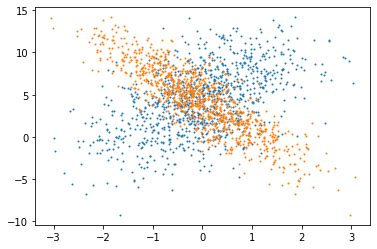

In [69]:
plt.scatter(features[:,(0)].detach().numpy(), labels.detach().numpy(),1)
plt.scatter(features[:,(1)].detach().numpy(), labels.detach().numpy(),1)

In [73]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.4372, -0.0745],
        [-2.0866,  0.3709],
        [-0.1610, -0.7756],
        [ 0.2017, -0.1372],
        [-0.5558, -0.7872],
        [-0.9680, -0.1600],
        [-0.5514,  0.0326],
        [-0.9267,  1.0297],
        [ 0.6868, -0.2916],
        [ 1.8320,  1.1615]]) 
 tensor([[ 7.3484],
        [-1.2470],
        [ 6.5201],
        [ 5.0568],
        [ 5.7471],
        [ 2.8220],
        [ 3.0059],
        [-1.1461],
        [ 6.5674],
        [ 3.9073]])


In [77]:
features, labels = synthetic_data(true_w, true_b, 1000)
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(X, w, b):
    return torch.matmul(X,w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.042670
epoch 2, loss 0.000172
epoch 3, loss 0.000052
